<a href="https://colab.research.google.com/github/muhammadalfateh6/-ALGORYC_Rep/blob/main/Yolo8_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from pathlib import Path
from xml.dom.minidom import parse
from shutil import copyfile
import os

In [4]:
!mkdir -p /content/drive/MyDrive/Object_Detection_P/Datasets/labels_p
!mkdir -p /content/drive/MyDrive/Object_Detection_P/Datasets/images_p

In [3]:
classes = ['helmet','head','person']

In [4]:
def convert_annot(size , box):
    x1 = int(box[0])
    y1 = int(box[1])
    x2 = int(box[2])
    y2 = int(box[3])

    dw = np.float32(1. / int(size[0]))
    dh = np.float32(1. / int(size[1]))

    w = x2 - x1
    h = y2 - y1
    x = x1 + (w / 2)
    y = y1 + (h / 2)

    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    return [x, y, w, h]


In [5]:
def save_txt_file(img_jpg_file_name, size, img_box):
    save_file_name = '/content/drive/MyDrive/Object_Detection_P/Datasets/labels/' +  img_jpg_file_name + '.txt'
    
    #file_path = open(save_file_name, "a+")
    with open(save_file_name ,'a+') as file_path:
        for box in img_box:

            cls_num = classes.index(box[0])

            new_box = convert_annot(size, box[1:])

            file_path.write(f"{cls_num} {new_box[0]} {new_box[1]} {new_box[2]} {new_box[3]}\n")

        file_path.flush()
        file_path.close()

In [6]:
def get_xml_data(file_path, img_xml_file):
    img_path = file_path + '/' + img_xml_file + '.xml'
    #print(img_path)

    dom = parse(img_path)
    root = dom.documentElement
    img_name = root.getElementsByTagName("filename")[0].childNodes[0].data
    img_size = root.getElementsByTagName("size")[0]
    objects = root.getElementsByTagName("object")
    img_w = img_size.getElementsByTagName("width")[0].childNodes[0].data
    img_h = img_size.getElementsByTagName("height")[0].childNodes[0].data
    img_c = img_size.getElementsByTagName("depth")[0].childNodes[0].data
   
    img_box = []
    for box in objects:
        cls_name = box.getElementsByTagName("name")[0].childNodes[0].data
        x1 = int(box.getElementsByTagName("xmin")[0].childNodes[0].data)
        y1 = int(box.getElementsByTagName("ymin")[0].childNodes[0].data)
        x2 = int(box.getElementsByTagName("xmax")[0].childNodes[0].data)
        y2 = int(box.getElementsByTagName("ymax")[0].childNodes[0].data)
        
        img_jpg_file_name = img_xml_file + '.jpg'
        img_box.append([cls_name, x1, y1, x2, y2])
  

    # test_dataset_box_feature(img_jpg_file_name, img_box)
    save_txt_file(img_xml_file, [img_w, img_h], img_box)

In [9]:
!ls /content/drive/MyDrive/Object_Detection_P/Datasets/labels_p

In [7]:
files = os.listdir('/content/drive/MyDrive/Object_Detection_P/Data_100/labels')
for file in files:
    file_xml = file.split(".")
    get_xml_data('/content/drive/MyDrive/Object_Detection_P/Data_100/labels', file_xml[0])

In [8]:
from sklearn.model_selection import train_test_split
image_list = os.listdir('/content/drive/MyDrive/Object_Detection_P/Data_100/images')
train_list, test_list = train_test_split(image_list, test_size=0.2, random_state=42)
val_list, test_list = train_test_split(test_list, test_size=0.5, random_state=42)
print('total =',len(image_list))
print('train :',len(train_list))
print('val   :',len(val_list))
print('test  :',len(test_list))

total = 100
train : 80
val   : 10
test  : 10


In [9]:
def copy_data(file_list, img_labels_root, imgs_source, mode):

    root_file = Path('/content/drive/MyDrive/Object_Detection_P/Datasets/images/'+  mode)
    if not root_file.exists():
        print(f"Path {root_file} does not exit")
        os.makedirs(root_file)

    root_file = Path('/content/drive/MyDrive/Object_Detection_P/Datasets/labels/' + mode)
    if not root_file.exists():
        print(f"Path {root_file} does not exit")
        os.makedirs(root_file)

    for file in file_list:               
        img_name = file.replace('.png', '')        
        img_src_file = imgs_source + '/' + img_name + '.png'        
        label_src_file = img_labels_root + '/' + img_name + '.txt'

        #print(img_sor_file)
        #print(label_sor_file)
        # im = Image.open(rf"{img_sor_file}")
        # im.show()

        # Copy image
        DICT_DIR = '/content/drive/MyDrive/Object_Detection_P/Datasets/images/'  + mode
        img_dict_file = DICT_DIR + '/' + img_name + '.png'

        copyfile(img_src_file, img_dict_file)

        # Copy label
        DICT_DIR = '/content/drive/MyDrive/Object_Detection_P/Datasets/labels/' + mode
        img_dict_file = DICT_DIR + '/' + img_name + '.txt'
        copyfile(label_src_file, img_dict_file)

In [10]:
copy_data(train_list, '/content/drive/MyDrive/Object_Detection_P/Datasets/labels', '/content/drive/MyDrive/Object_Detection_P/Data_100/images', "train")
copy_data(val_list,   '/content/drive/MyDrive/Object_Detection_P/Datasets/labels', '/content/drive/MyDrive/Object_Detection_P/Data_100/images', "val")
copy_data(test_list,  '/content/drive/MyDrive/Object_Detection_P/Datasets/labels', '/content/drive/MyDrive/Object_Detection_P/Data_100/images', "test")

Path /content/drive/MyDrive/Object_Detection_P/Datasets/images/train does not exit
Path /content/drive/MyDrive/Object_Detection_P/Datasets/labels/train does not exit
Path /content/drive/MyDrive/Object_Detection_P/Datasets/images/val does not exit
Path /content/drive/MyDrive/Object_Detection_P/Datasets/labels/val does not exit
Path /content/drive/MyDrive/Object_Detection_P/Datasets/images/test does not exit
Path /content/drive/MyDrive/Object_Detection_P/Datasets/labels/test does not exit


In [16]:
%cd /content/drive/MyDrive/Object_Detection_P
!git clone https://github.com/ultralytics/ultralytics

/content/drive/MyDrive/Object_Detection_P
Cloning into 'ultralytics'...
remote: Enumerating objects: 10315, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 10315 (delta 37), reused 38 (delta 14), pack-reused 10234
Receiving objects: 100% (10315/10315), 6.42 MiB | 9.51 MiB/s, done.
Resolving deltas: 100% (7029/7029), done.
Updating files: 100% (367/367), done.


In [24]:
!git clone https://github.com/ultralytics/ultralytics

fatal: destination path 'ultralytics' already exists and is not an empty directory.


In [25]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
!ls /content/drive/MyDrive/Object_Detection_P/Datasets/labels

test  train  val


In [35]:
%cd /content/drive/MyDrive/Object_Detection_P

import yaml
# Create configuration
config = {
   "path": "/content/drive/MyDrive/Object_Detection_P/Datasets/images",
   "train": "train",
   "val": "val",
   "test": "test",
   "nc": 3,
   "names": ['helmet','head','person']
}
with open("data_8.yaml", "w") as file:
   yaml.dump(config, file, default_flow_style=False)

/content/drive/MyDrive/Object_Detection_P


In [36]:
!cat /content/drive/MyDrive/Object_Detection_P/data_8.yaml

names:
- helmet
- head
- person
nc: 3
path: /content/drive/MyDrive/Object_Detection_P/Datasets/images
test: test
train: train
val: val


In [22]:
%env WANDB_SILENT=true

env: WANDB_SILENT=true


In [37]:
!yolo task=detect mode=train data=/content/drive/MyDrive/Object_Detection_P/data_8.yaml model=yolov8s.pt epochs=5 lr0=0.01

Ultralytics YOLOv8.0.113 🚀 Python-3.10.11 torch-2.0.1+cu118 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Object_Detection_P/data_8.yaml, epochs=5, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynam

In [38]:
!ls /content/drive/MyDrive/Object_Detection_P/runs/detect/train5

args.yaml					     R_curve.png
confusion_matrix_normalized.png			     results.csv
confusion_matrix.png				     results.png
events.out.tfevents.1685947724.ee70788fa6be.19547.0  train_batch0.jpg
F1_curve.png					     train_batch1.jpg
labels_correlogram.jpg				     train_batch2.jpg
labels.jpg					     val_batch0_labels.jpg
P_curve.png					     val_batch0_pred.jpg
PR_curve.png					     weights


In [39]:
from IPython.display import Image, clear_output
import matplotlib.pyplot as plt
%matplotlib inline

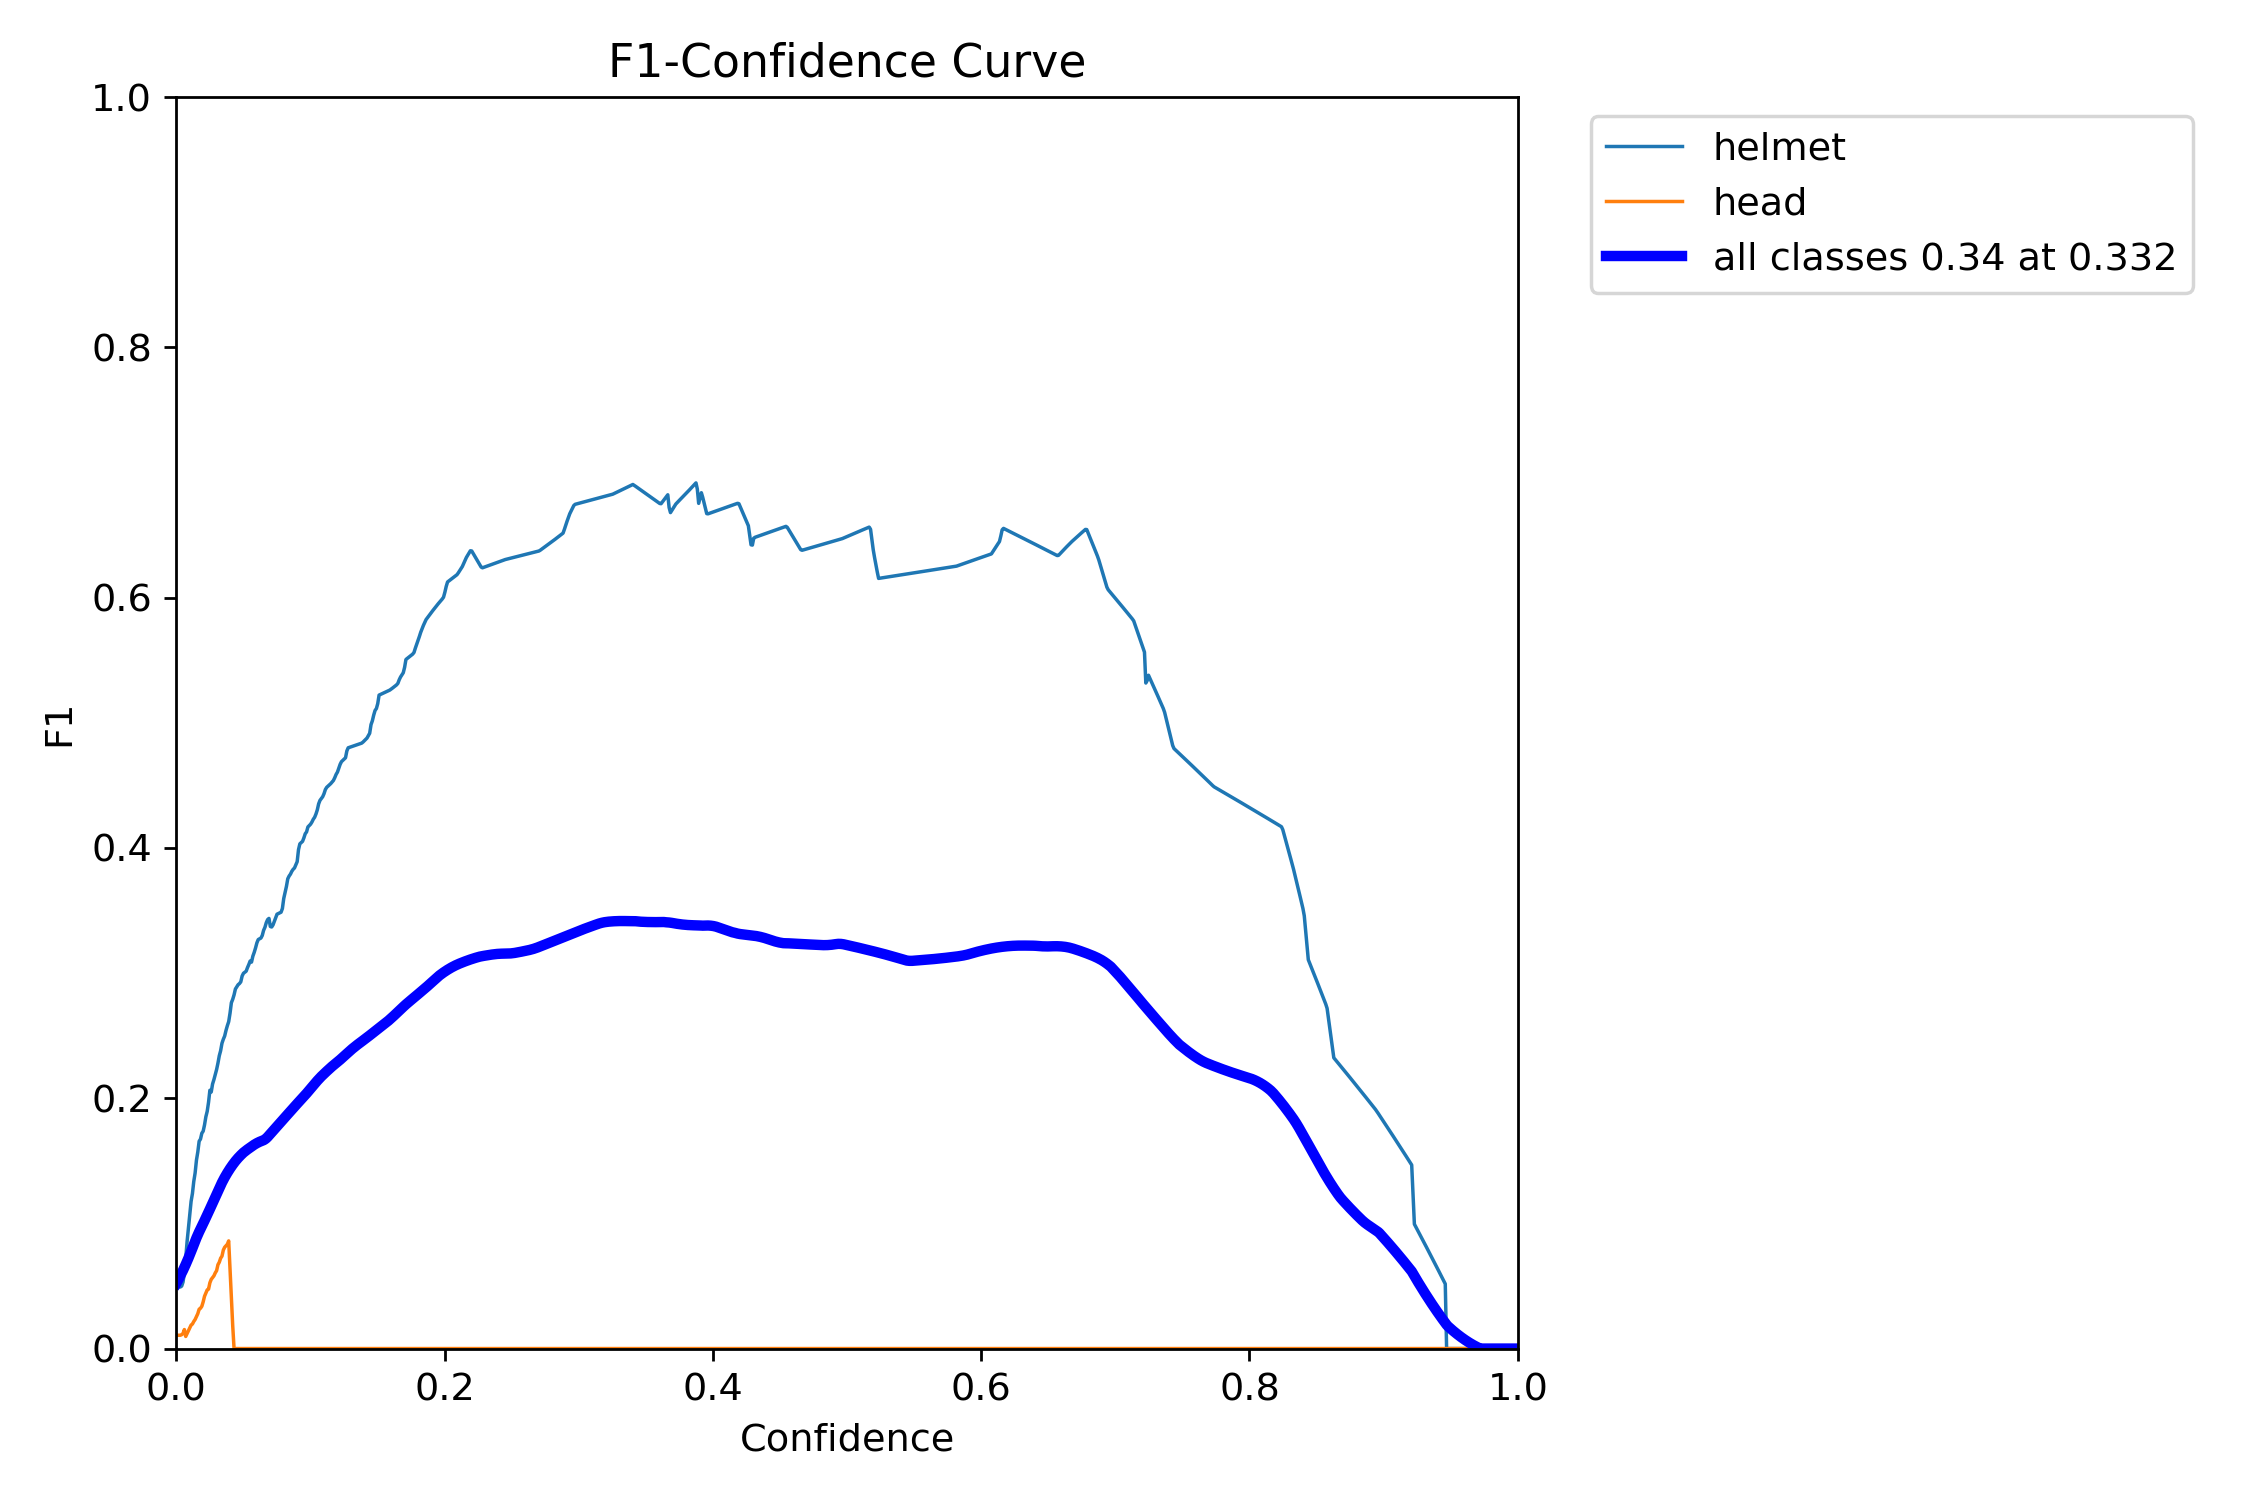

In [40]:
Image(filename='/content/drive/MyDrive/Object_Detection_P/runs/detect/train5/F1_curve.png', width=600)


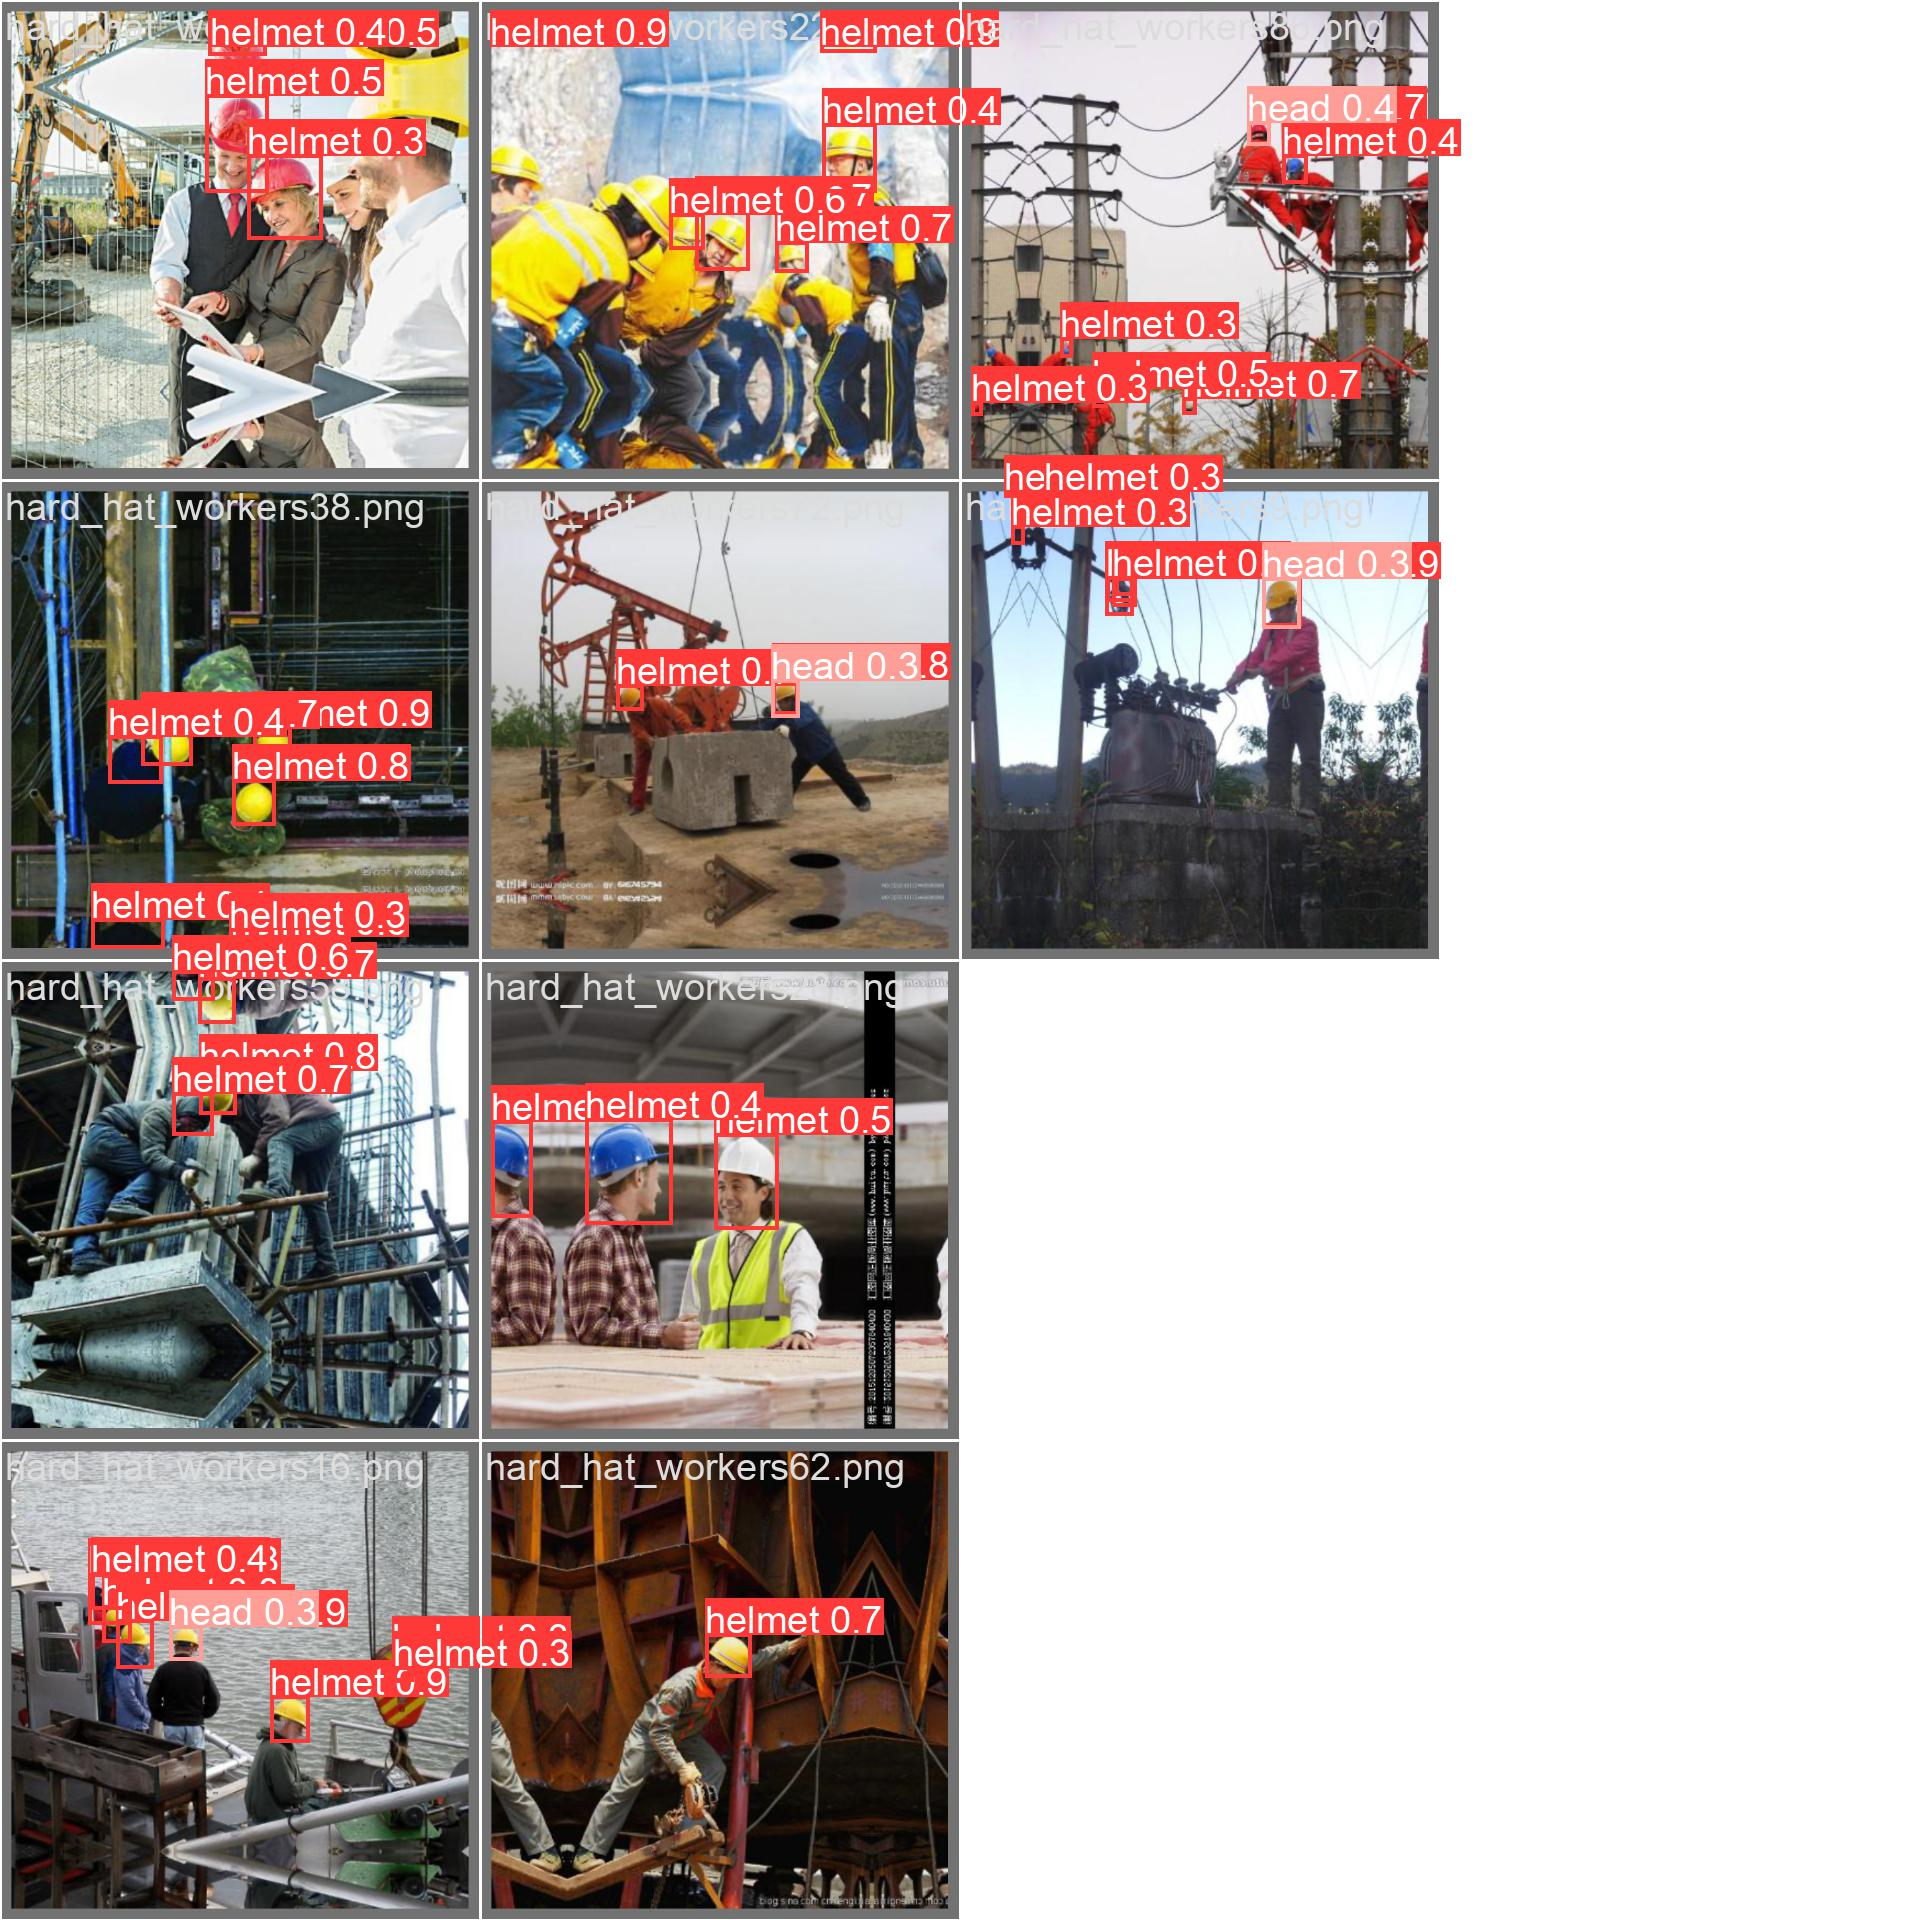

In [41]:
Image(filename='/content/drive/MyDrive/Object_Detection_P/runs/detect/train5/val_batch0_pred.jpg', width=600)